### Basics of Tensorflow

In [33]:
import numpy as np

from tensorflow.python.layers import base
import tensorflow as tf
import tensorflow.contrib.slim as slim


# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

### Model summary for tensorflow

In [6]:
# model summary for tensorflow
x = np.zeros((1,4,4,3))
x_tf = tf.convert_to_tensor(x, np.float32)
z_tf = tf.layers.conv2d(x_tf, filters=32, kernel_size=(3,3))

def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
conv2d/kernel:0 (float32_ref 3x3x3x32) [864, bytes: 3456]
conv2d/bias:0 (float32_ref 32) [32, bytes: 128]
conv2d_1/kernel:0 (float32_ref 3x3x3x32) [864, bytes: 3456]
conv2d_1/bias:0 (float32_ref 32) [32, bytes: 128]
Total size of variables: 1792
Total bytes of variables: 7168


### Inspired from https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/1_Introduction/basic_operations.ipynb

In [12]:

# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.
a = tf.constant(2)
b = tf.constant(3)

# Launch the default graph.
with tf.Session() as sess:
    print ("a: %i" % sess.run(a), "b: %i" % sess.run(b))
    print ("Addition with constants: %i" % sess.run(a+b))
    print ("Multiplication with constants: %i" % sess.run(a*b))

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


https://github.com/vahidk/EffectiveTensorflow
### Numpy version of below
import numpy as np

x = np.random.normal(size=[10, 10])

y = np.random.normal(size=[10, 10])

z = np.dot(x, y)

print(z)

In [13]:
import tensorflow as tf

x = tf.random_normal([10, 10])
y = tf.random_normal([10, 10])
z = tf.matmul(x, y)

sess = tf.Session()
z_val = sess.run(z)

print(z_val)

[[ 0.34614965 -7.3237243   0.9355222   0.7125121   4.2473693  -3.2875426
   2.6320853   0.60445595 -1.8011832  -1.4778548 ]
 [-8.892176    2.2700188   0.84772235  0.44044608  1.9714642   0.20464115
  -1.4039882   1.1470723   0.18000975  0.34565252]
 [ 1.6059456  -4.0441747   2.264099   -2.958685    0.69468784  0.38571823
   5.6918163   1.4194463   1.7618747  -4.2023764 ]
 [-1.2256149   2.5026336  -0.5831862   1.1683558   0.60250676  0.34096497
  -2.0679157   1.0514991  -2.714299    0.22064567]
 [-5.664401   -4.645505   -1.6683139   2.680467    0.61823153  1.5860802
  -4.2265906   2.8202052  -0.52584696 -3.7972417 ]
 [-5.008916   -3.762639   -0.66483474  3.618266    3.3554142  -5.250147
  -0.41241854  0.91815126 -4.481329   -2.478259  ]
 [ 4.498228    2.0109146   0.91723716  1.3889239   0.18919843 -7.4312754
   3.381404    0.9045108  -6.4896193   2.0509806 ]
 [ 1.5027142   1.0791501  -0.530404   -0.5126542   1.0960672   2.2281358
   0.20963605  0.53031576  1.7040433   2.4191246 ]
 [-5.3

In [19]:
tf.reset_default_graph()

##### Note the below doesn't explain the basics. hence skip the below for a while
To understand how powerful symbolic computation can be let's have a look at another example. Assume that we have samples from a curve (say f(x) = 5x^2 + 3) and we want to estimate f(x) based on these samples. We define a parametric function g(x, w) = w0 x^2 + w1 x + w2, which is a function of the input x and latent parameters w, our goal is then to find the latent parameters such that g(x, w) ≈ f(x). This can be done by minimizing the following loss function: L(w) = ∑ (f(x) - g(x, w))^2. Although there's a closed form solution for this simple problem, we opt to use a more general approach that can be applied to any arbitrary differentiable function, and that is using stochastic gradient descent. We simply compute the average gradient of L(w) with respect to w over a set of sample points and move in the opposite direction.

Here's how it can be done in TensorFlow:

In [21]:
import numpy as np
import tensorflow as tf

tf.reset_default_graph()

# Placeholders are used to feed values from python to TensorFlow ops. We define
# two placeholders, one for input feature x, and one for output y.
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Assuming we know that the desired function is a polynomial of 2nd degree, we
# allocate a vector of size 3 to hold the coefficients. The variable will be
# automatically initialized with random noise.
w = tf.get_variable("w", shape=[3, 1])

# We define yhat to be our estimate of y.
f = tf.stack([tf.square(x), x, tf.ones_like(x)], 1)
yhat = tf.squeeze(tf.matmul(f, w), 1)

# The loss is defined to be the l2 distance between our estimate of y and its
# true value. We also added a shrinkage term, to ensure the resulting weights
# would be small.
loss = tf.nn.l2_loss(yhat - y) + 0.1 * tf.nn.l2_loss(w)

# We use the Adam optimizer with learning rate set to 0.1 to minimize the loss.
train_op = tf.train.AdamOptimizer(0.1).minimize(loss)

def generate_data():
    x_val = np.random.uniform(-10.0, 10.0, size=100)
    y_val = 5 * np.square(x_val) + 3
    return x_val, y_val

sess = tf.Session()
# Since we are using variables we first need to initialize them.
sess.run(tf.global_variables_initializer())
for _ in range(1000):
    x_val, y_val = generate_data()
    _, loss_val = sess.run([train_op, loss], {x: x_val, y: y_val})
    #print(loss_val)
print(sess.run([w]))


[array([[ 4.9953189e+00],
       [-5.3842890e-05],
       [ 3.2785773e+00]], dtype=float32)]


# 
Normal Equation (θ = XT · X)–1 · XT · y for house market prediction

In [29]:
import numpy as np
from sklearn.datasets import fetch_california_housing

tf.reset_default_graph()
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess: 
    theta_value = theta.eval()
    print(theta_value)

[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


In [35]:
# Pure numpy version
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


## Using Batch Gradient Descent

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


In [47]:
#Gradient Descent
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
print(best_theta)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.71450067
Epoch 200 MSE = 0.5667049
Epoch 300 MSE = 0.5555719
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.5396294
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.5321474
[[ 2.0685523 ]
 [ 0.8874027 ]
 [ 0.14401656]
 [-0.34770885]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.66145283]
 [-0.6375278 ]]


In [48]:
# Using autodiff
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = tf.gradients(mse, [theta])[0]

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.566705
Epoch 300 MSE = 0.5555719
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.5396294
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.5321474
Best theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


## Linear Regression Example
https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb

Epoch: 0050 cost= 0.126894742 W= 0.3745814 b= -0.097686656
Epoch: 0100 cost= 0.121124744 W= 0.36714777 b= -0.044209745
Epoch: 0150 cost= 0.116021343 W= 0.36015627 b= 0.00608666
Epoch: 0200 cost= 0.111507520 W= 0.35358056 b= 0.05339157
Epoch: 0250 cost= 0.107515201 W= 0.3473959 b= 0.09788313
Epoch: 0300 cost= 0.103984140 W= 0.3415792 b= 0.1397285
Epoch: 0350 cost= 0.100861095 W= 0.33610845 b= 0.1790852
Epoch: 0400 cost= 0.098098941 W= 0.33096302 b= 0.21610112
Epoch: 0450 cost= 0.095655993 W= 0.3261235 b= 0.25091574
Epoch: 0500 cost= 0.093495443 W= 0.3215719 b= 0.28365952
Epoch: 0550 cost= 0.091584556 W= 0.31729096 b= 0.31445622
Epoch: 0600 cost= 0.089894608 W= 0.31326464 b= 0.343421
Epoch: 0650 cost= 0.088400029 W= 0.3094778 b= 0.3706633
Epoch: 0700 cost= 0.087078258 W= 0.3059162 b= 0.39628544
Epoch: 0750 cost= 0.085909322 W= 0.30256656 b= 0.42038321
Epoch: 0800 cost= 0.084875606 W= 0.29941604 b= 0.44304764
Epoch: 0850 cost= 0.083961442 W= 0.29645273 b= 0.46436492
Epoch: 0900 cost= 0.08

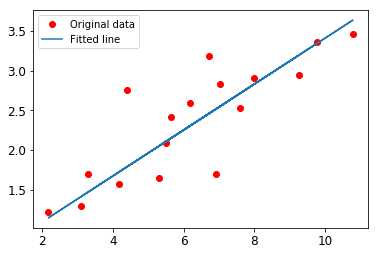

In [52]:
rng = np.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights and bias random
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model. y = XW + b
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W = ", sess.run(W), "b = ", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W = ", sess.run(W), "b = ", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    

In [54]:
# Logistic Regression Example

# Import MINST data
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [56]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [63]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            print ("W = ", sess.run(W), "b = ", sess.run(b))

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))
    
    

Epoch: 0001 cost= 1.184351654
W =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] b =  [-0.03730078  0.079611   -0.01896858 -0.02118796  0.01909295  0.0290922
 -0.0093307   0.03109496 -0.06625962 -0.00584353]
Epoch: 0002 cost= 0.665294986
W =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] b =  [-0.05097382  0.11064371 -0.02714274 -0.03299111  0.03137657  0.06248994
 -0.01303456  0.0533782  -0.11813473 -0.01561154]
Epoch: 0003 cost= 0.552845062
W =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] b =  [-0.06005226  0.13130666 -0.03169165 -0.04252985  0.03687295  0.09206253
 -0.01484207  0.07162529 -0.161586   -0.02116575]
Epoch: 0004 cost= 0.498638791
W =  [[0. 0. 0

## Simple neural network
A 2-Hidden Layers Fully Connected Neural Network (a.k.a Multilayer Perceptron)
implementation with TensorFlow. This example is using the MNIST database
of handwritten digits (http://yann.lecun.com/exdb/mnist/).


In [89]:
def simple_nn (layer1_n,layer2_n) : 
    print("Starting simple Neural network " + str(layer1_n) +" : " + str(layer2_n) )
    reset_graph()
    # Parameters
    learning_rate = 0.1
    num_steps = 500
    batch_size = 128
    display_step = 100

    # Network Parameters
    n_hidden_1 = layer1_n # 1st layer number of neurons
    n_hidden_2 = layer2_n # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with layer 1 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with layer 2 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    # display all the parameters
    vars = 0
    for v in tf.all_variables():
        vars += np.prod(v.get_shape().as_list())
    print(vars)
    
    # Start training
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)

        for step in range(1, num_steps+1):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                     Y: batch_y})
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))

        print("Optimization Finished!")

        # Calculate accuracy for MNIST test images
        print("Testing Accuracy:", \
            sess.run(accuracy, feed_dict={X: mnist.test.images,
                                          Y: mnist.test.labels}))
    


In [85]:
simple_nn(2048,2048)
simple_nn(1024,1024)
simple_nn(512,512)
simple_nn(256,256)
simple_nn(128,128)
simple_nn(24,24)
# 256 : 256 > 807968.0
# 512 : 512 > 2009120.0

Starting simple Neural network 2048 : 2048
17473568.0
Step 1, Minibatch Loss= 474724.2500, Training Accuracy= 0.352
Step 100, Minibatch Loss= 12443.1035, Training Accuracy= 0.867
Step 200, Minibatch Loss= 6874.4072, Training Accuracy= 0.852
Step 300, Minibatch Loss= 1211.8154, Training Accuracy= 0.914
Step 400, Minibatch Loss= 1998.8522, Training Accuracy= 0.875
Step 500, Minibatch Loss= 1319.4133, Training Accuracy= 0.852
Optimization Finished!
Testing Accuracy: 0.8519
Starting simple Neural network 1024 : 1024
5591072.0
Step 1, Minibatch Loss= 103726.3438, Training Accuracy= 0.484
Step 100, Minibatch Loss= 6831.8525, Training Accuracy= 0.852
Step 200, Minibatch Loss= 2858.8306, Training Accuracy= 0.836
Step 300, Minibatch Loss= 1054.2766, Training Accuracy= 0.914
Step 400, Minibatch Loss= 358.0754, Training Accuracy= 0.883
Step 500, Minibatch Loss= 553.5654, Training Accuracy= 0.867
Optimization Finished!
Testing Accuracy: 0.8651
Starting simple Neural network 512 : 512
2009120.0
Ste

In [87]:
simple_nn(512,128)
simple_nn(12,12)

Starting simple Neural network 512 : 128
1406624.0
Step 1, Minibatch Loss= 15699.5000, Training Accuracy= 0.258
Step 100, Minibatch Loss= 399.3960, Training Accuracy= 0.844
Step 200, Minibatch Loss= 127.8773, Training Accuracy= 0.906
Step 300, Minibatch Loss= 94.4084, Training Accuracy= 0.828
Step 400, Minibatch Loss= 23.0377, Training Accuracy= 0.930
Step 500, Minibatch Loss= 21.7889, Training Accuracy= 0.906
Optimization Finished!
Testing Accuracy: 0.842
Starting simple Neural network 12 : 12
29120.0
Step 1, Minibatch Loss= 173.4673, Training Accuracy= 0.117
Step 100, Minibatch Loss= 1.9999, Training Accuracy= 0.773
Step 200, Minibatch Loss= 0.7199, Training Accuracy= 0.836
Step 300, Minibatch Loss= 0.4309, Training Accuracy= 0.875
Step 400, Minibatch Loss= 0.5109, Training Accuracy= 0.867
Step 500, Minibatch Loss= 0.7298, Training Accuracy= 0.852
Optimization Finished!
Testing Accuracy: 0.861


## Simple Neural Network (tf.layers/estimator api) 
A 2-Hidden Layers Fully Connected Neural Network (a.k.a Multilayer Perceptron)
implementation with TensorFlow. This example is using the MNIST database
of handwritten digits (http://yann.lecun.com/exdb/mnist/).

This example is using TensorFlow layers, see 'neural_network_raw' example for
a raw implementation with variables.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/5h/qfyzgyfn5rg6s6vt938bsm0w0000gn/T/tmpol911jvr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c40d18080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


TypeError: Failed to convert object of type <class 'dict'> to Tensor. Contents: {'images': <tf.Tensor 'random_shuffle_queue_DequeueMany:1' shape=(128, 784) dtype=float32>}. Consider casting elements to a supported type.

NameError: name 'model' is not defined